<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task2/CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
file_path = "/content/drive/MyDrive/Dataset/CitarumWater.csv"
data = pd.read_csv(file_path)

In [18]:
# Preprocessing: Cleaning the 'Temp' column by removing the '°C' and converting to float
data['Temp'] = data['Temp'].str.replace('°C', '').astype(float)

In [19]:
# Selecting features (independent variables) and target
features = ['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat']
X = data[features]  # Independent variables
y = data['Class']   # Dependent variable (target)

In [20]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [23]:
# Evaluating the model with different metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

In [24]:
# ROC curve (binary classification requires probabilities; using class 2 as an example)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)


In [25]:
# Compile results into a dictionary for better readability
evaluation_results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC': auc,
    'Classification Report': classification_report(y_test, y_pred)
}

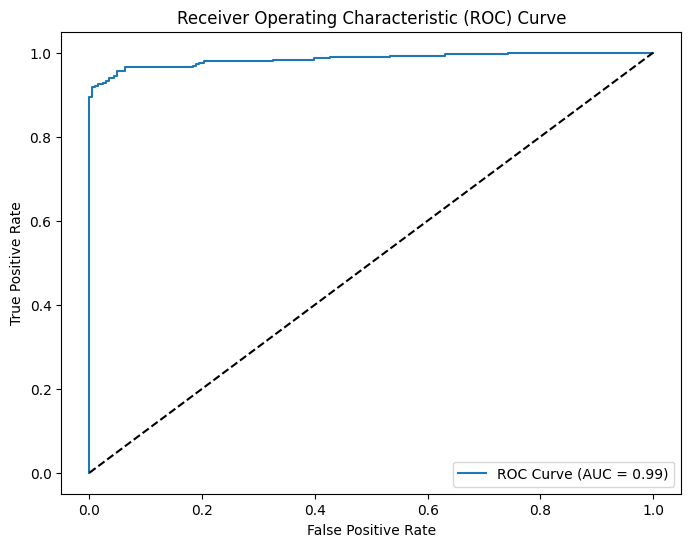

In [26]:


# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
